### Mise en forme et affichage

In [1]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_metrics_1 = pd.read_csv('results/df_d_0.csv')
df_metrics_2 = pd.read_csv('results/df_d_31.csv')
df_metrics_3 = pd.read_csv('results/df_d_45.csv')
df_metrics_4 = pd.read_csv('results/df_d_57.csv')
df_metrics_5 = pd.read_csv('results/df_d_65.csv')
df_metrics_6 = pd.read_csv('results/df_d_73.csv')
df_metrics_7 = pd.read_csv('results/df_d_85.csv')
df_metrics_8 = pd.read_csv('results/df_d_91.csv')
df_metrics_9 = pd.read_csv('results/df_d_97.csv')
df_metrics_10 = pd.read_csv('results/df_d_103.csv')
df_metrics_11 = pd.read_csv('results/df_d_109.csv')
df_metrics_12 = pd.read_csv('results/df_d_120.csv')
list_df = ['df_metrics_' + str(i) for i in range(1,12)]

# Concat all subset
df_performance = pd.concat([df_metrics_1, df_metrics_2, df_metrics_3, df_metrics_4, df_metrics_5, df_metrics_6,
               df_metrics_7, df_metrics_8, df_metrics_9, df_metrics_10, df_metrics_11, df_metrics_12])
# Print data
df_performance

,Unnamed: 0,RMSE_val,RMSE_test,R2_test,Score_test,alpha,rul_piecewise,sequence_length
0,0,13.798644,12.604187,0.882500,802.040449,0.1,100,20
1,1,10.461751,11.406910,0.882500,802.040449,0.1,100,20
2,2,10.126985,11.683905,0.882500,802.040449,0.1,100,20
3,0,14.304620,15.373553,0.850110,1719.977717,0.1,120,20
4,1,10.198321,12.376318,0.850110,1719.977717,0.1,120,20
...,...,...,...,...,...,...,...,...
28,1,9.020067,13.275942,0.852327,1120.181248,0.5,140,60
29,2,8.927020,14.221973,0.852327,1120.181248,0.5,140,60
30,0,12.264822,14.827873,0.813754,1258.155475,0.5,150,60
31,1,10.724541,15.973829,0.813754,1258.155475,0.5,150,60


In [4]:
# Create ID for data performance
df_performance['ID'] = df_performance.apply(lambda row: f"{row['alpha']}_{row['rul_piecewise']}_{row['sequence_length']}", 
                                            axis=1)

# Displaying the resulting DataFrame with the new 'ID' column
df_performance.shape

(360, 9)

In [5]:
df_performance

,Unnamed: 0,RMSE_val,RMSE_test,R2_test,Score_test,alpha,rul_piecewise,sequence_length,ID
0,0,13.798644,12.604187,0.882500,802.040449,0.1,100,20,0.1_100.0_20.0
1,1,10.461751,11.406910,0.882500,802.040449,0.1,100,20,0.1_100.0_20.0
2,2,10.126985,11.683905,0.882500,802.040449,0.1,100,20,0.1_100.0_20.0
3,0,14.304620,15.373553,0.850110,1719.977717,0.1,120,20,0.1_120.0_20.0
4,1,10.198321,12.376318,0.850110,1719.977717,0.1,120,20,0.1_120.0_20.0
...,...,...,...,...,...,...,...,...,...
28,1,9.020067,13.275942,0.852327,1120.181248,0.5,140,60,0.5_140.0_60.0
29,2,8.927020,14.221973,0.852327,1120.181248,0.5,140,60,0.5_140.0_60.0
30,0,12.264822,14.827873,0.813754,1258.155475,0.5,150,60,0.5_150.0_60.0
31,1,10.724541,15.973829,0.813754,1258.155475,0.5,150,60,0.5_150.0_60.0


In [6]:
df_performance.sort_values("RMSE_test").head(5)

,Unnamed: 0,RMSE_val,RMSE_test,R2_test,Score_test,alpha,rul_piecewise,sequence_length,ID
11,2,8.561112,9.839594,0.882118,731.429247,0.1,100,60,0.1_100.0_60.0
14,2,8.837831,10.140252,0.902844,506.469249,0.5,100,40,0.5_100.0_40.0
65,2,9.540615,10.380211,0.870658,1195.338263,0.1,120,25,0.1_120.0_25.0
35,2,9.632092,10.397241,0.890024,688.000702,0.5,120,30,0.5_120.0_30.0
14,2,9.433204,10.484751,0.898252,579.744859,0.2,150,35,0.2_150.0_35.0


In [7]:
# Find duplicate rows based on specific columns (col1 and col2 in this case)
duplicate_rows = df_performance[df_performance.duplicated(subset=['ID'])]

# Drop duplicate rows based on specific columns (col1 and col2 in this case)
df_performance_unique = df_performance.drop_duplicates(subset=['ID'], keep='first')
df_performance_unique

,Unnamed: 0,RMSE_val,RMSE_test,R2_test,Score_test,alpha,rul_piecewise,sequence_length,ID
0,0,13.798644,12.604187,0.882500,802.040449,0.1,100,20,0.1_100.0_20.0
3,0,14.304620,15.373553,0.850110,1719.977717,0.1,120,20,0.1_120.0_20.0
6,0,14.014377,12.264827,0.871283,1063.120258,0.1,130,20,0.1_130.0_20.0
9,0,14.625023,15.174299,0.853891,1033.478287,0.1,140,20,0.1_140.0_20.0
12,0,14.436641,13.673966,0.874049,1152.191829,0.1,150,20,0.1_150.0_20.0
...,...,...,...,...,...,...,...,...,...
18,0,12.175420,19.099485,0.626517,4558.075448,0.5,100,60,0.5_100.0_60.0
21,0,12.380879,10.888178,0.895333,553.578222,0.5,120,60,0.5_120.0_60.0
24,0,12.312407,15.064319,0.838729,1029.633614,0.5,130,60,0.5_130.0_60.0
27,0,12.531778,12.499844,0.852327,1120.181248,0.5,140,60,0.5_140.0_60.0


In [8]:
#df_metrics_0 = pd.read_csv('results/df_metrics_016.csv)
df_metrics_1 = pd.read_csv('results/df_metrics_16.csv', sep=';')
df_metrics_2 = pd.read_csv('results/df_metrics_24.csv')
df_metrics_3 = pd.read_csv('results/df_metrics_31.csv')
df_metrics_4 = pd.read_csv('results/df_metrics_45.csv')
df_metrics_5 = pd.read_csv('results/df_metrics_57.csv')
df_metrics_6 = pd.read_csv('results/df_metrics_65.csv')
df_metrics_7 = pd.read_csv('results/df_metrics_73.csv')
df_metrics_8 = pd.read_csv('results/df_metrics_85.csv')
df_metrics_9 = pd.read_csv('results/df_metrics_91.csv')
df_metrics_10 = pd.read_csv('results/df_metrics_97.csv')
df_metrics_11 = pd.read_csv('results/df_metrics_103.csv')
df_metrics_12 = pd.read_csv('results/df_metrics_109.csv')
df_metrics_13 = pd.read_csv('results/df_metrics_120.csv')
# list_df = ['df_metrics_' + str(i) for i in range(1,12)]
# list_df

df = pd.concat([df_metrics_1, df_metrics_2, df_metrics_3, df_metrics_4, df_metrics_5, df_metrics_6,
               df_metrics_7, df_metrics_8, df_metrics_9, df_metrics_10, df_metrics_11, df_metrics_12, df_metrics_13])


In [9]:
# df.to_csv('results/df_metrics_all.csv', index=False)
df=df.drop(['Unnamed: 0'],axis=1)
df.shape

(481, 12)

In [10]:
df.columns

Index(['identity', 'separability', 'stability', 'coherence', 'completness',
       'congruence', 'selectivity', 'accumen', 'alpha', 'upper',
       'sequence_length', 'explainer'],
      dtype='object')

In [11]:
# Find duplicate rows based on specific columns (col1 and col2 in this case)
duplicate_rows = df[df.duplicated(subset=['alpha', 'upper', 'sequence_length', 'explainer'])]

# Drop duplicate rows based on specific columns (col1 and col2 in this case)
df = df.drop_duplicates(subset=['alpha', 'upper', 'sequence_length', 'explainer'], keep='first')
                    
                    # Creating a new 'ID' column based on the values in 'Column1', 'Column2', and 'Column3'
df['ID'] = df.apply(lambda row: f"{row['alpha']}_{row['upper']}_{row['sequence_length']}", axis=1)

# Displaying the resulting DataFrame with the new 'ID' column
df.head()

,identity,separability,stability,coherence,completness,congruence,selectivity,accumen,alpha,upper,sequence_length,explainer,ID
0,1.0,1.0,1.0,0.192458,0.809572,0.234775,0.714386,0.115556,0.1,100,20,lime,0.1_100_20
1,1.0,1.0,0.9,0.192833,0.808804,0.235678,0.808205,0.362796,0.1,100,20,shap,0.1_100_20
2,1.0,1.0,1.0,0.411627,0.436281,0.110497,0.536943,NaN,0.1,100,20,saliency,0.1_100_20
3,1.0,1.0,1.0,0.240693,0.758026,0.281548,0.755209,0.052903,0.1,100,20,l2x,0.1_100_20
4,1.0,1.0,1.0,0.172190,0.845714,0.203024,0.620965,0.074552,0.1,120,20,lime,0.1_120_20


In [14]:
df.shape

(480, 13)

In [14]:
# df_sq20 = df.query('sequence_length==20')
# # df_sq20
# # df_drop = df_sq20.drop(['Unnamed: 0', 'accumen', 'alpha', 'upper',
# #        'sequence_length',], axis = 1)
# # df_shap = df.query('explainer=="shap"')
# # df_sq120 = df.query('sequence=="shap"')
# df_drop.groupby('explainer').plot(kind = 'box')

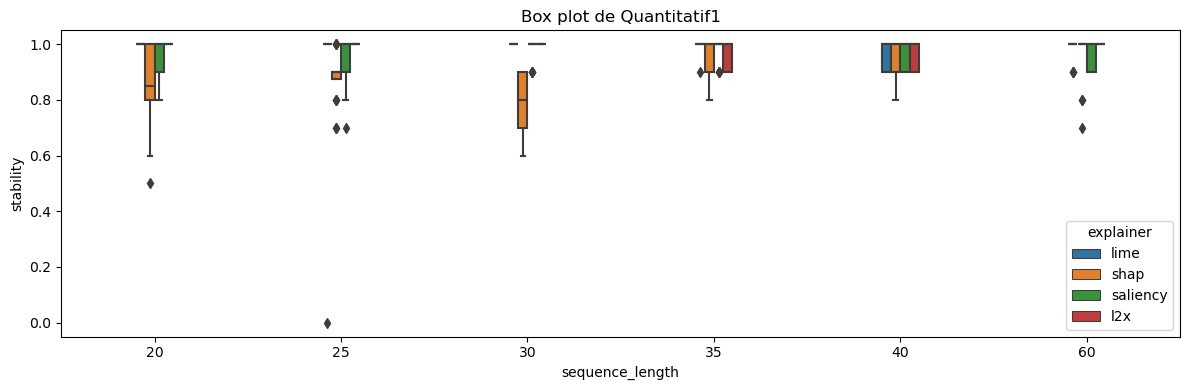

In [15]:
# Utilisez seaborn pour créer des box plots
plt.figure(figsize=(12, 4))

# Box plot pour Quantitatif1 en fonction de la catégorie
#plt.subplot(1, 3, 1)
sns.boxplot(x='sequence_length', y='stability', hue = 'explainer', data=df, width=0.2)
plt.title('Box plot de Quantitatif1')

plt.tight_layout()
plt.show()

In [16]:
df.columns

Index(['identity', 'separability', 'stability', 'coherence', 'completness',
       'congruence', 'selectivity', 'accumen', 'alpha', 'upper',
       'sequence_length', 'explainer', 'ID'],
      dtype='object')

In [17]:
df = df.query('explainer!="saliency"')

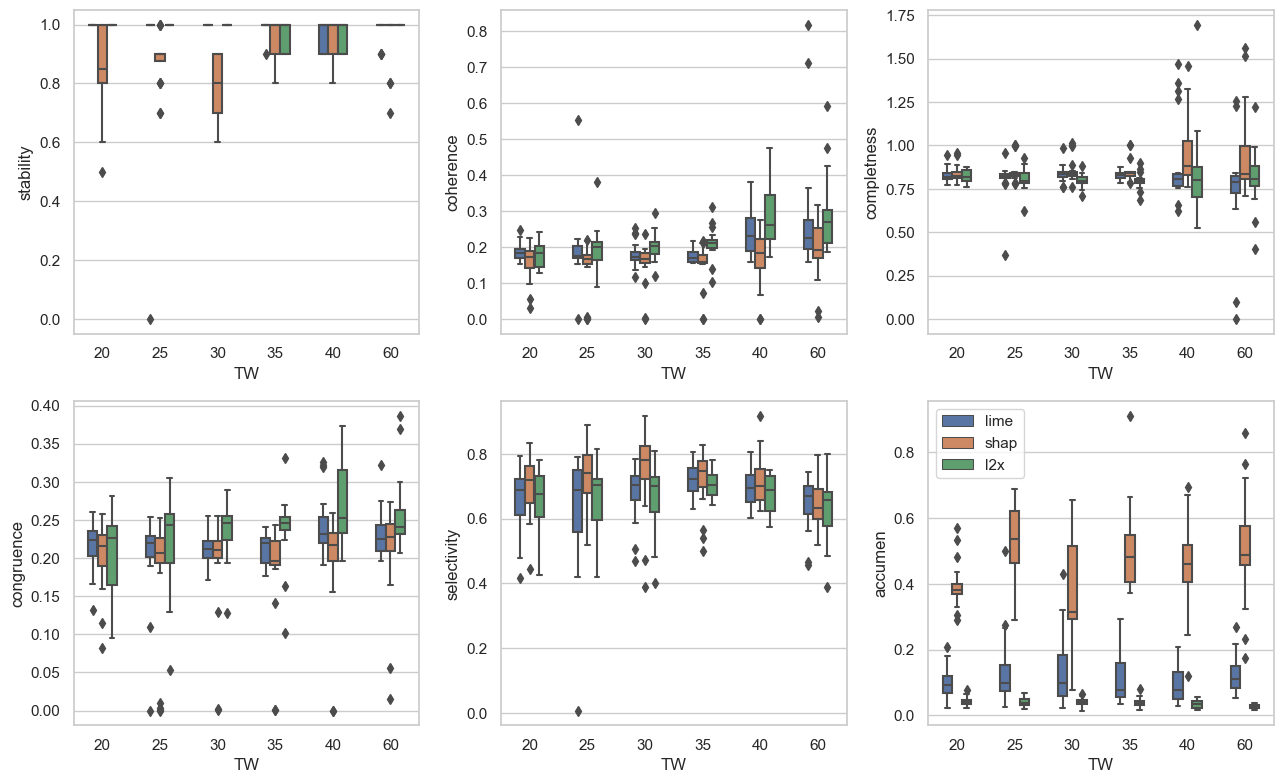

In [18]:
# Définissez la première colonne quantitative comme axe des abscisses
df.columns = ['identity', 'separability', 'stability', 'coherence', 'completness',
       'congruence', 'selectivity', 'accumen', 'alpha', 'rul_early',
       'TW', 'explainer', 'ID']
plt.figure(figsize=(13, 8))
sns.set(style="whitegrid")

# Créez une seule légende en dehors de la boucle
for i in range(2, 8):  # Les huit premières colonnes sont quantitatives
    plt.subplot(2, 3, i - 1)
    sns.boxplot(x='TW', y=df.columns[i], hue='explainer', width=0.5, data=df)

#plt.legend(title='explainer', bbox_to_anchor=(1.05, 1), loc='upper left')
for ax in plt.gcf().get_axes():
    ax.legend().set_visible(False)
#plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('results/metric_tw.png')
plt.show()
#plt.savefig('results/metric_tw.png')

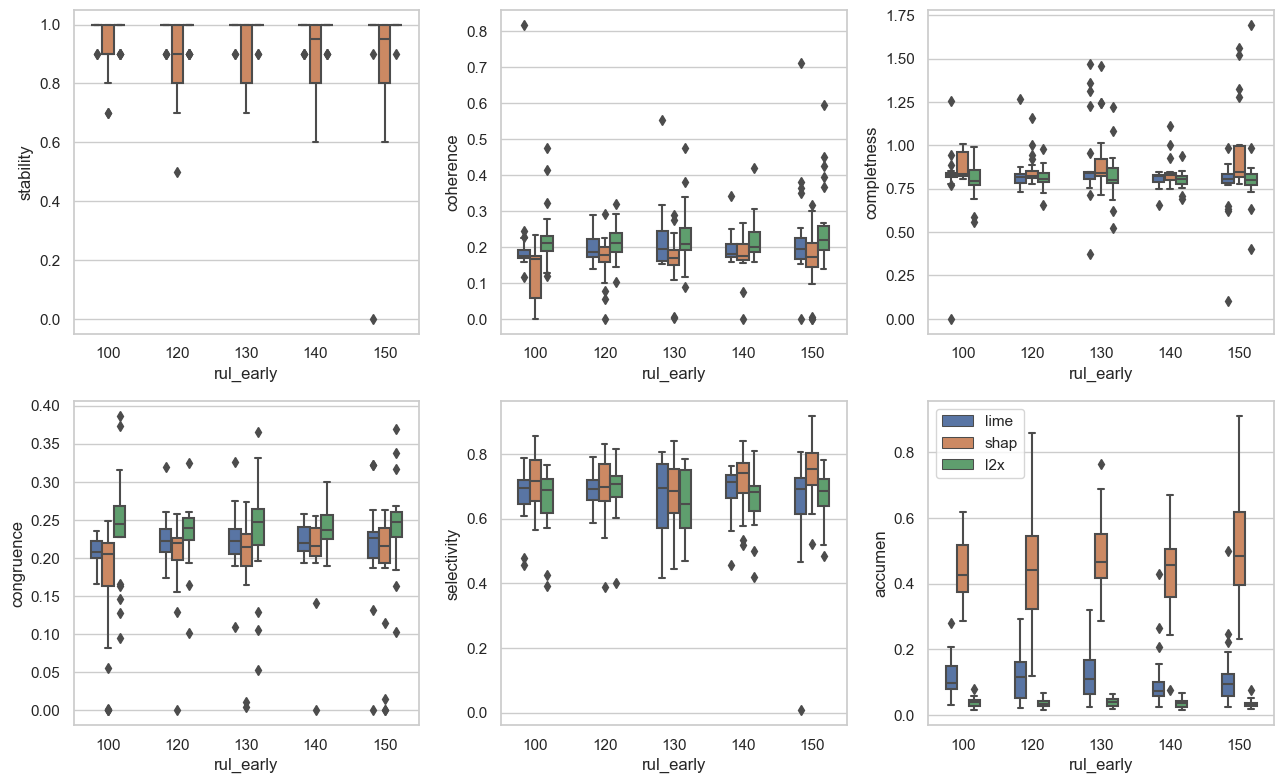

In [19]:
# Définissez la première colonne quantitative comme axe des abscisses
plt.figure(figsize=(13, 8))
sns.set(style="whitegrid")

# Créez une seule légende en dehors de la boucle
legend_created = False

for i in range(2, 8):  # Les huit premières colonnes sont quantitatives
    plt.subplot(2, 3, i - 1)
    sns.boxplot(x='rul_early', y=df.columns[i],hue='explainer', width=0.5, data=df)

#plt.legend(title='explainer', bbox_to_anchor=(1.05, 1), loc='upper left')
for ax in plt.gcf().get_axes():
    ax.legend().set_visible(False)
#plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('results/metric_rul.png')
plt.show()

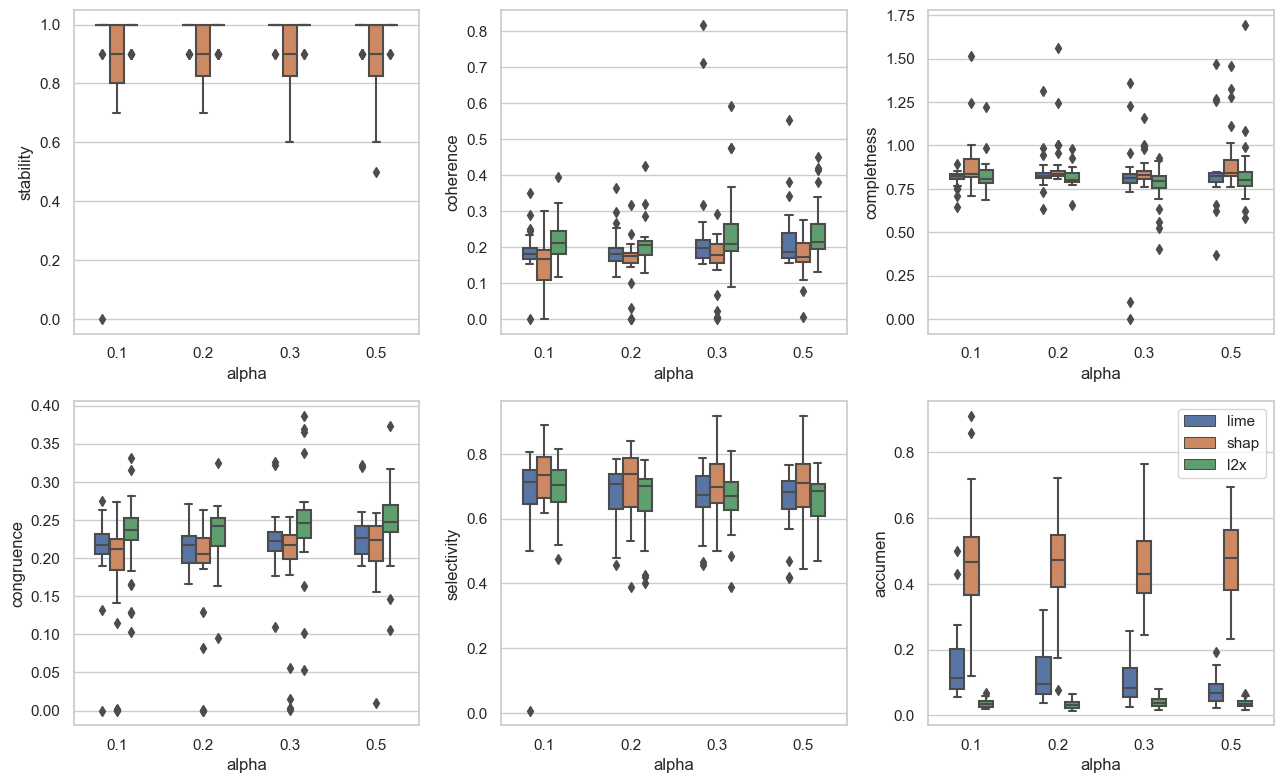

In [20]:
# Définissez la première colonne quantitative comme axe des abscisses
df_saliency = df.query('explainer!="saliency"')
plt.figure(figsize=(13, 8))
sns.set(style="whitegrid")

# Créez une seule légende en dehors de la boucle
legend_created = False

for i in range(2, 8):  # Les huit premières colonnes sont quantitatives
    plt.subplot(2, 3, i -1)
    sns.boxplot(x='alpha', y=df.columns[i],hue='explainer', width=0.5, data=df_saliency)

#plt.legend(title='explainer', bbox_to_anchor=(1.05, 1), loc='upper left')
for ax in plt.gcf().get_axes():
    ax.legend().set_visible(False)
#plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('results/metric_alpha.png')
plt.show()

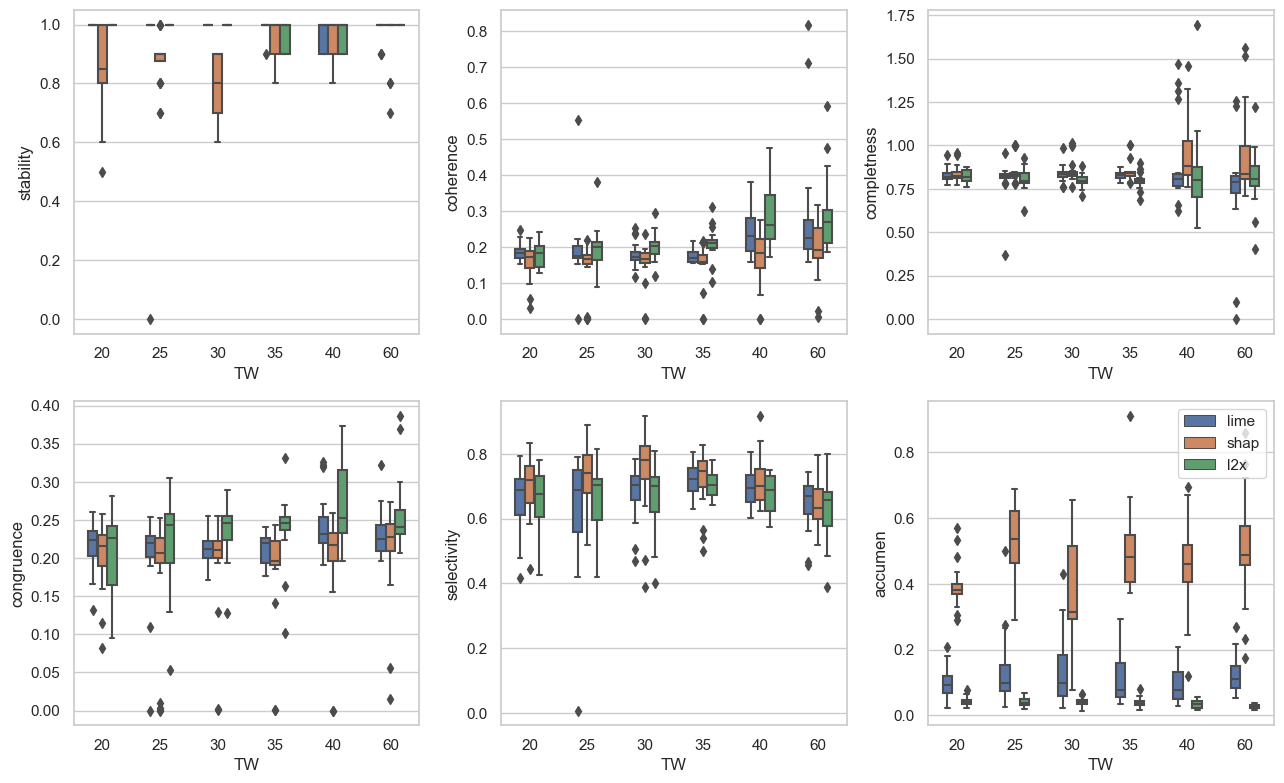

In [21]:
# Définissez la première colonne quantitative comme axe des abscisses
plt.figure(figsize=(13, 8))
sns.set(style="whitegrid")

# Créez une seule légende en dehors de la boucle
legend_created = False

for i in range(2, 8):  # Les huit premières colonnes sont quantitatives
    plt.subplot(2, 3, i - 1)
    sns.boxplot(x='TW', y=df.columns[i],hue='explainer', width=0.5, data=df)

#plt.legend(title='explainer', bbox_to_anchor=(1.05, 1), loc='upper left')
for ax in plt.gcf().get_axes():
    ax.legend().set_visible(False)
#plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [22]:
# Merging the two DataFrames based on the 'ID' column using a left join
df_merged = pd.merge(df, df_performance_unique, on='ID', how='left')

# Displaying the resulting DataFrame
df_merged.head()

,identity,separability,stability,coherence,completness,congruence,selectivity,accumen,alpha_x,rul_early,...,explainer,ID,Unnamed: 0,RMSE_val,RMSE_test,R2_test,Score_test,alpha_y,rul_piecewise,sequence_length
0,1.0,1.0,1.0,0.192458,0.809572,0.234775,0.714386,0.115556,0.1,100,...,lime,0.1_100_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,0.9,0.192833,0.808804,0.235678,0.808205,0.362796,0.1,100,...,shap,0.1_100_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,0.240693,0.758026,0.281548,0.755209,0.052903,0.1,100,...,l2x,0.1_100_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,0.172190,0.845714,0.203024,0.620965,0.074552,0.1,120,...,lime,0.1_120_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,0.055553,0.945879,0.159912,0.727704,0.481613,0.1,120,...,shap,0.1_120_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#df_merged=df_merged.drop(['Unnamed: 0'],axis=1)
print(df_merged.shape)
df_merged.head()

(360, 21)


,identity,separability,stability,coherence,completness,congruence,selectivity,accumen,alpha_x,rul_early,...,explainer,ID,Unnamed: 0,RMSE_val,RMSE_test,R2_test,Score_test,alpha_y,rul_piecewise,sequence_length
0,1.0,1.0,1.0,0.192458,0.809572,0.234775,0.714386,0.115556,0.1,100,...,lime,0.1_100_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,0.9,0.192833,0.808804,0.235678,0.808205,0.362796,0.1,100,...,shap,0.1_100_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,0.240693,0.758026,0.281548,0.755209,0.052903,0.1,100,...,l2x,0.1_100_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,0.172190,0.845714,0.203024,0.620965,0.074552,0.1,120,...,lime,0.1_120_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,0.055553,0.945879,0.159912,0.727704,0.481613,0.1,120,...,shap,0.1_120_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_performance.sort_values("RMSE_test")

,Unnamed: 0,RMSE_val,RMSE_test,R2_test,Score_test,alpha,rul_piecewise,sequence_length,ID
11,2,8.561112,9.839594,0.882118,731.429247,0.1,100,60,0.1_100.0_60.0
14,2,8.837831,10.140252,0.902844,506.469249,0.5,100,40,0.5_100.0_40.0
65,2,9.540615,10.380211,0.870658,1195.338263,0.1,120,25,0.1_120.0_25.0
35,2,9.632092,10.397241,0.890024,688.000702,0.5,120,30,0.5_120.0_30.0
14,2,9.433204,10.484751,0.898252,579.744859,0.2,150,35,0.2_150.0_35.0
...,...,...,...,...,...,...,...,...,...
5,2,13.531888,29.087874,0.658466,23861.116331,0.1,150,60,0.1_150.0_60.0
1,1,17.746307,29.993439,0.657668,29547.587759,0.2,150,60,0.2_150.0_60.0
2,2,14.747784,30.217772,0.730263,22628.377481,0.5,130,40,0.5_130.0_40.0
3,0,32.003368,35.333871,0.442315,15508.670724,0.2,120,30,0.2_120.0_30.0


model avec les best paramètres

In [118]:
#df_merged.to_excel('results/all_result.xlsx')

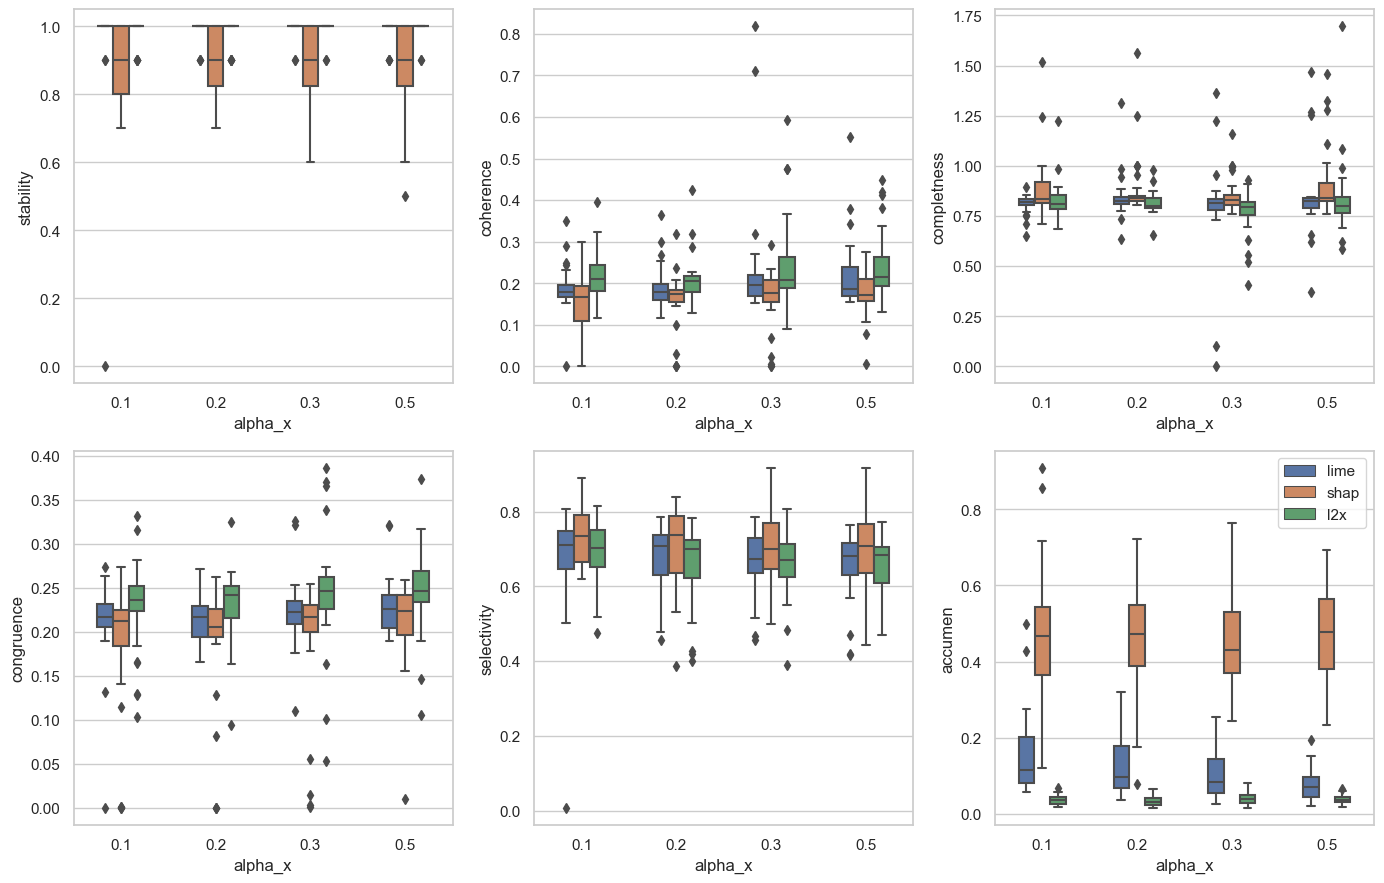

In [25]:
# Définissez la première colonne quantitative comme axe des abscisses
plt.figure(figsize=(14, 9))
sns.set(style="whitegrid")

# Créez une seule légende en dehors de la boucle
legend_created = False

for i in range(2, 8):  # Les huit premières colonnes sont quantitatives
    plt.subplot(2, 3, i-1)
    #sns.lineplot(x='alpha_x', y='R2_test',hue='explainer', data=df_merged)
    sns.boxplot(x='alpha_x', y=df.columns[i],hue='explainer', width=0.5, data=df_merged)
    #sns.lineplot(x='alpha_x', y='R2_test',hue='explainer', data=df_merged)

#plt.legend(title='explainer', bbox_to_anchor=(1.05, 1), loc='upper left')
for ax in plt.gcf().get_axes():
    ax.legend().set_visible(False)
#plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [27]:
df_merged.columns

Index(['identity', 'separability', 'stability', 'coherence', 'completness',
       'congruence', 'selectivity', 'accumen', 'alpha_x', 'rul_early', 'TW',
       'explainer', 'ID', 'Unnamed: 0', 'RMSE_val', 'RMSE_test', 'R2_test',
       'Score_test', 'alpha_y', 'rul_piecewise', 'sequence_length'],
      dtype='object')

In [28]:
df_merged.columns = ['identity', 'separability', 'stability', 'coherence', 'completness',
       'congruence', 'selectivity', 'accumen', 'alpha', 'rul_early',
       'TW', 'explainer', 'ID', 'Unnamed: 0', 'RMSE_val', 'RMSE_test',
       'R2_test', 'Score_test', 'alpha_y', 'rul_piecewise',
       'sequence_length_y']

In [29]:
df_merged = df_merged.drop(['Unnamed: 0'], axis = 1)

In [30]:
df_merged

,identity,separability,stability,coherence,completness,congruence,selectivity,accumen,alpha,rul_early,TW,explainer,ID,RMSE_val,RMSE_test,R2_test,Score_test,alpha_y,rul_piecewise,sequence_length_y
0,1.0,1.0,1.0,0.192458,0.809572,0.234775,0.714386,0.115556,0.1,100,20,lime,0.1_100_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,0.9,0.192833,0.808804,0.235678,0.808205,0.362796,0.1,100,20,shap,0.1_100_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,0.240693,0.758026,0.281548,0.755209,0.052903,0.1,100,20,l2x,0.1_100_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,0.172190,0.845714,0.203024,0.620965,0.074552,0.1,120,20,lime,0.1_120_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,0.055553,0.945879,0.159912,0.727704,0.481613,0.1,120,20,shap,0.1_120_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,1.0,1.0,1.0,0.164295,0.834727,0.203648,0.577268,0.512384,0.5,140,60,shap,0.5_140_60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,1.0,1.0,1.0,0.306366,0.689604,0.299429,0.580150,0.032515,0.5,140,60,l2x,0.5_140_60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,1.0,1.0,1.0,0.230851,0.769096,0.217790,0.715639,0.075590,0.5,150,60,lime,0.5_150_60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,1.0,1.0,1.0,0.257073,1.280094,0.248068,0.613117,0.232443,0.5,150,60,shap,0.5_150_60,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_merged.R2_test.dtype

dtype('float64')

C:\ProgramData\anaconda3\envs\env_test\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\envs\env_test\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


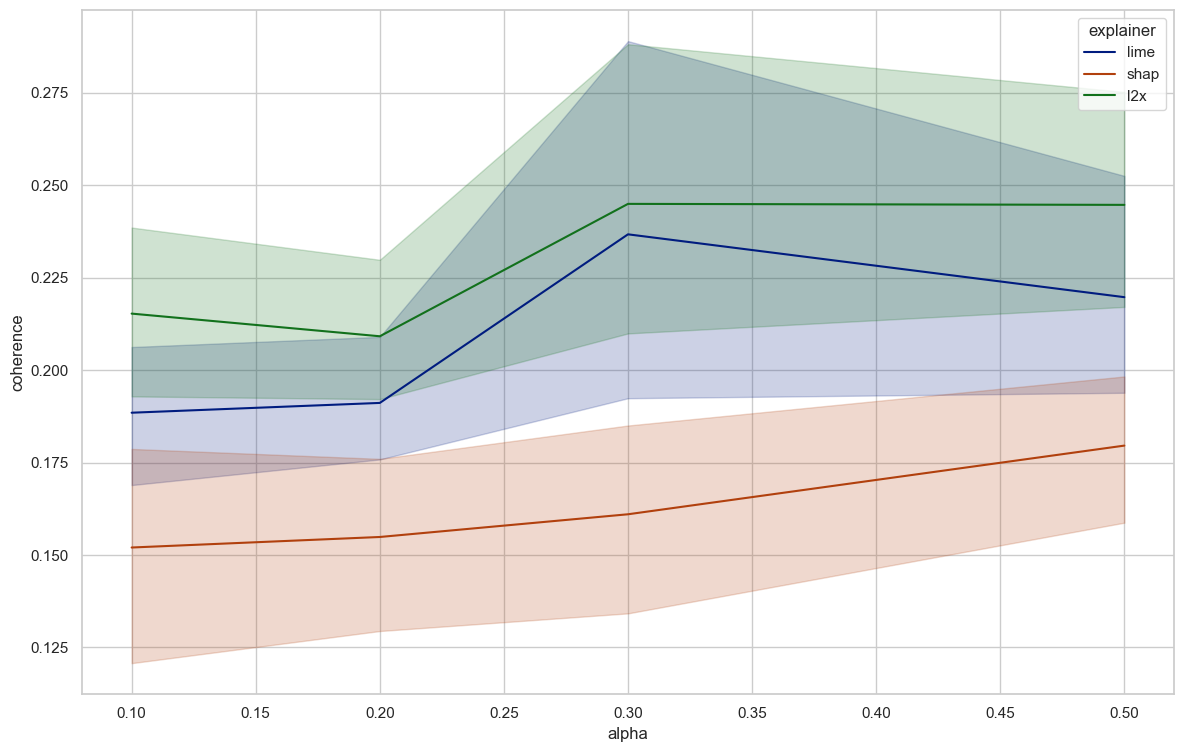

In [32]:
# Create boxplots for each combination
df_merged = df_merged.query('explainer!="saliency"')
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

#sns.lineplot(x='alpha', y='R2_test', data=df_merged)
sns.lineplot(x='alpha', y='coherence', hue = 'explainer', data=df_merged, palette='dark')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [33]:
# alpha = 0.5, rul=100, TW=40
df_best = df_merged.query('alpha==0.5 & TW == 40 & rul_early == 100')

C:\ProgramData\anaconda3\envs\env_test\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\envs\env_test\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\envs\env_test\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\envs\env_test\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

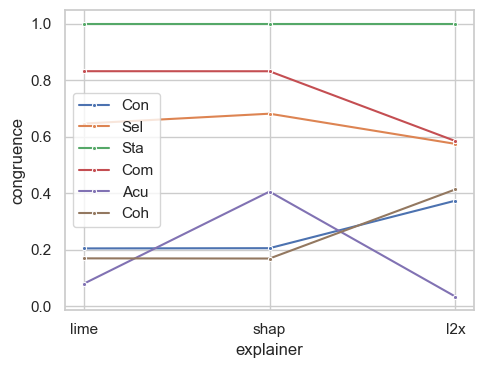

In [35]:
# Create boxplots for each combination
plt.figure(figsize=(5, 4))
sns.set(style="whitegrid")

#sns.lineplot(x='alpha_x', y='R2_test', data=df_best)
sns.lineplot(x = 'explainer', y='congruence', data=df_best, label='Con', marker='.')
sns.lineplot(x = 'explainer', y='selectivity', data=df_best, label='Sel', marker='.')
sns.lineplot(x = 'explainer', y='stability', data=df_best, label='Sta', marker='.')
sns.lineplot(x = 'explainer', y='completness', data=df_best, label='Com', marker='.')
sns.lineplot(x = 'explainer', y='accumen', data=df_best, label = 'Acu', marker='.')
sns.lineplot(x = 'explainer', y='coherence', data=df_best, label = 'Coh', marker='.')

plt.tight_layout(rect=[0, 0, 1, 0.96])
#plt.legend(loc='upper right')
plt.savefig('results/metric_best.png')
plt.show()

In [163]:
df_merged.sort_values("RMSE_test")

,identity,separability,stability,coherence,completness,congruence,selectivity,accumen,alpha_x,upper,sequence_length_x,explainer,ID,RMSE_val,RMSE_test,R2_test,Score_test,alpha_y,rul_piecewise,sequence_length_y
403,1.0,1.0,1.0,0.226648,0.771592,0.268952,0.704395,0.024172,0.1,100,60,l2x,0.1_100_60,8.561112,9.839594,0.882118,731.429247,0.1,100,60
400,1.0,1.0,1.0,0.185090,0.815657,0.229590,0.703937,0.085292,0.1,100,60,lime,0.1_100_60,8.561112,9.839594,0.882118,731.429247,0.1,100,60
401,1.0,1.0,1.0,0.185295,0.814677,0.230347,0.795819,0.472920,0.1,100,60,shap,0.1_100_60,8.561112,9.839594,0.882118,731.429247,0.1,100,60
383,1.0,1.0,1.0,0.413204,0.584382,0.373299,0.574276,0.033596,0.5,100,40,l2x,0.5_100_40,8.837831,10.140252,0.902844,506.469249,0.5,100,40
381,1.0,1.0,1.0,0.168399,0.831441,0.205010,0.681174,0.405403,0.5,100,40,shap,0.5_100_40,8.837831,10.140252,0.902844,506.469249,0.5,100,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,1.0,1.0,1.0,0.300069,1.517906,0.239125,0.712147,0.716806,0.1,150,60,shap,0.1_150_60,14.764228,26.346613,0.658466,23861.116331,0.1,150,60
419,1.0,1.0,1.0,0.395077,0.983842,0.247350,0.665685,0.029321,0.1,150,60,l2x,0.1_150_60,14.764228,26.346613,0.658466,23861.116331,0.1,150,60
439,1.0,1.0,1.0,0.425343,0.772883,0.251326,0.614391,0.038188,0.2,150,60,l2x,0.2_150_60,21.449484,28.407525,0.657668,29547.587759,0.2,150,60
436,1.0,1.0,1.0,0.363487,0.635655,0.244811,0.619420,0.123647,0.2,150,60,lime,0.2_150_60,21.449484,28.407525,0.657668,29547.587759,0.2,150,60


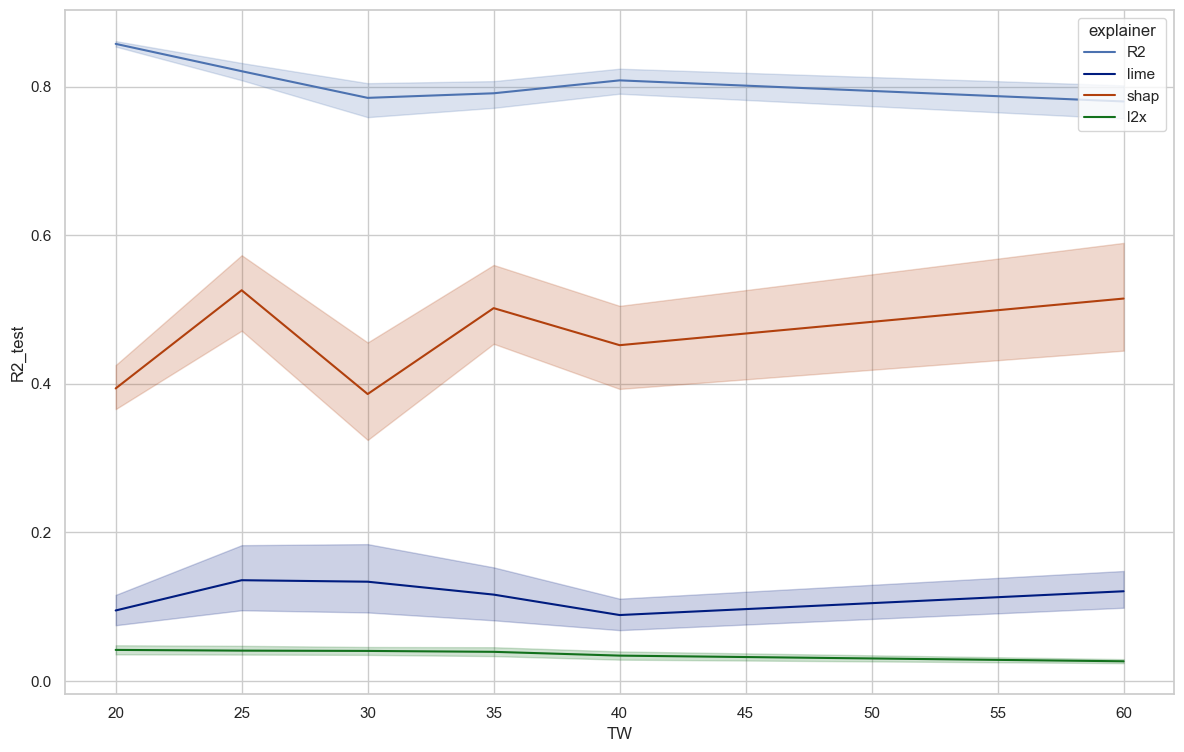

In [209]:
# Create boxplots for each combination
df_merged = df_merged.query('explainer!="saliency"')
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.lineplot(x='TW', y='R2_test', data=df_merged, label = "R2")
sns.lineplot(x='TW', y='accumen', hue = 'explainer', data=df_merged, palette='dark')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [1]:
## before importing the package, make sure you have placd the stability folder (contining the __init__.py file) in the right directory
import stability_forlder as st

## Let us first observe the description and contents of the package
help(st)

Help on package stability_forlder:

NAME
    stability_forlder

DESCRIPTION
    This package implements the statistical tools for quantifying the stability of feature selection as given in [1].
    It includes 5 functions that provide:
        - the stability estimate of a feature selection procedure given its outputs;
        - the variance of the stability estimate;
        - a (1-alpha)- approximate confidence intervals for the population stability;
        - a null hypothesis test allowing to compare the population stability of a feature selection procedure to 
          a given value.
        - a null hypothesis test allowing to compare the population stabilities of two feature selection procedures.
    
    [1] On the Stability of Feature Selection. Sarah Nogueira, Konstantinos Sechidis, Gavin Brown. 
        Journal of Machine Learning Reasearch (JMLR). 2017.
    
    You can find a full demo using this package at:
    http://htmlpreview.github.io/?https://github.com/nogueirs/JM

In [9]:
## first we implement Z1 and Z2 as lists of size M*d
Z1=[[1,1,0],[1,1,0],[1,1,0]]
Z2=[[1,1,0],[1,1,0],[0,1,1]]
stab1=st.getStability(Z1)
stab2=st.getStability(Z2)
print('Stability of procedure 1 is :',stab1)
print('Stability of procedure 2 is :',stab2)

Stability of procedure 1 is : 1.0
Stability of procedure 2 is : -2.220446049250313e-16
